In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [16]:
root = "/Users/bencekover/Library/CloudStorage/OneDrive-Personal/MSci Bahler lab/S.-Pombe-MLPs - Github/"
df_full=pd.read_excel(root + 'external data/Atkinson et al 2018/Supplemental_Table_S3.xlsx',header=2)
df_full.head()

/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,gene_ID,start,end,strand,chr,ratio_rrp6,ratio_rrp6D,ratio_rrp6D.rRNAD,ratio_dis3.54,ratio_ago1,ratio_dcr1,ratio_rdp1,ratio_exo2,ratio_exo2.rRNAD,ratio_ski7,ratio_cid14,ratio_pab2,ratio_pan2,ratio_upf1,ratio_dcr1.exo2,ratio_dcr1.rrp6,ratio_YE,ratio_YEF,ratio_MN,ratio_MN.7d,ratio_G100,ratio_G50,ratio_m0h,ratio_m2h,ratio_m4h,ratio_m6h,ratio_m8h,pval_rrp6,pval_rrp6D,pval_rrp6D.rRNAD,pval_dis3.54,pval_ago1,pval_dcr1,pval_rdp1,pval_exo2,pval_exo2.rRNAD,pval_ski7,pval_cid14,pval_pab2,pval_pan2,pval_upf1,pval_dcr1.exo2,pval_dcr1.rrp6,pval_YE,pval_YEF,pval_MN,pval_MN.7d,pval_G100,pval_G50,pval_m0h,pval_m2h,pval_m4h,pval_m6h,pval_m8h,RPKM_MM1,RPKM_MM2,RPKM_MMT1,RPKM_YE1,RPKM_YEF1,RPKM_YEF2,RPKM_ago1.1,RPKM_ago1.2,RPKM_ago1.3,RPKM_cid14.1,RPKM_cid14.2,RPKM_dcr1.1,RPKM_dcr1.2,RPKM_dis3.54.1,RPKM_dis3.54.2,RPKM_exo2.1,RPKM_exo2.2,RPKM_exo2.rRNAD.1,RPKM_pab2.1.1,RPKM_pab2.1.2,RPKM_pan2.1,RPKM_pan2.2,RPKM_rdp1.1,RPKM_rdp1.2,RPKM_rrp6.1,RPKM_rrp6.2,RPKM_rrp6D.1,RPKM_rrp6D.2,RPKM_rrp6D.rRNAD.1,RPKM_rrp6D.rRNAD.2,RPKM_ski7.1,RPKM_ski7.2,RPKM_upf1.1.1,RPKM_upf1.1.2,RPKM_upf1.2,RPKM_dcr1.exo2.1,RPKM_dcr1.exo2.2,RPKM_dcr1.rrp6.1,RPKM_dcr1.rrp6.2,RPKM_MN1,RPKM_MN2,RPKM_MN7.7d,RPKM_MN8.7d,RPKM_G100.1,RPKM_G100.2,RPKM_G50.1,RPKM_G50.2,RPKM_m0h.1,RPKM_m0h.2,RPKM_m2h.1,RPKM_m2h.2,RPKM_m4h.1,RPKM_m4h.2,RPKM_m6h.1,RPKM_m6h.2,RPKM_m8h.1,RPKM_m8h.2,CUT,XUT,DUT,Eser et al. data,Wery et al. data,Eser method on rrp6 data,Eser method on exo2 data,Eser method on dcr1 data
0,SPAC212.11,1,5662,-,1,-0.58,0.68,1.60,0.88,0.32,-0.53,-1.32,3.12,2.67,-3.00,0.27,-2.83,-0.46,-0.38,3.39,0.95,-1.55,0.09,-2.40,-2.58,-3.65,-2.61,-2.60,-2.95,-3.41,-3.00,-2.04,0.481965,0.395768,0.034436,0.268082,0.756615,0.555170,0.117931,4.539763e-05,0.005190,0.000442,0.823869,0.003507,0.691179,0.734535,0.000011,0.196290,0.311931,0.980235,0.001415,0.000488,9.676245e-07,0.000482,0.000587,0.000100,0.000003,0.000038,0.004426,0.17,0.25,3.67,0.46,0.87,2.05,1.50,1.93,2.47,2.27,2.16,1.13,1.12,2.57,4.50,26.18,12.47,17.53,0.19,0.05,1.17,0.81,0.50,0.69,1.50,1.45,2.76,3.05,5.91,6.55,0.17,0.13,1.40,1.80,0.68,24.36,23.47,4.45,4.49,0.27,0.30,0.18,0.38,0.09,0.06,0.09,0.32,0.23,0.19,0.19,0.18,0.13,0.05,0.14,0.11,0.30,0.34,0,0,0,0,NaN,1,1,1
1,SPNCRNA.2000,346,1164,+,1,-0.22,1.60,2.27,2.43,-0.69,1.40,-0.11,3.54,2.90,-0.06,1.09,-0.49,0.02,0.53,0.59,2.19,-0.84,-2.31,-0.68,-1.35,-1.24,-0.38,-1.22,-2.14,-3.12,0.75,1.39,0.781835,0.003734,0.000110,0.000005,0.396278,0.017251,0.902156,8.979094e-12,0.000033,0.986719,0.100019,0.712030,0.997554,0.512995,0.395684,0.000012,0.684111,0.076235,0.400386,0.080495,1.413442e-01,0.640382,0.118637,0.010368,0.000865,0.213109,0.009436,0.30,0.08,0.16,0.09,NaN,0.02,0.09,0.11,0.16,0.55,0.43,0.46,0.68,1.06,1.46,2.99,2.37,2.01,0.15,0.07,0.07,0.27,0.14,0.24,0.38,0.13,0.55,0.80,1.18,1.17,0.22,0.15,0.32,0.38,0.23,0.27,0.41,1.12,1.40,0.04,0.23,0.08,0.09,0.11,0.03,0.04,0.23,0.07,0.08,0.04,0.03,NaN,NaN,0.29,0.27,0.52,0.53,0,1,0,0,NaN,0,1,0
2,SPNCRNA.2001,2118,2347,+,1,-1.22,2.34,-1.21,1.48,-0.95,1.49,0.34,2.02,-0.81,-0.12,-0.29,1.74,-1.09,0.19,1.05,1.35,-1.25,-0.74,-1.97,-1.51,-1.26,-1.96,0.24,-1.28,-2.15,-0.85,0.62,0.301765,0.009780,0.320032,0.125624,0.479324,0.142075,0.790785,4.121185e-02,0.624808,NaN,0.855350,0.178379,NaN,0.910217,0.348330,0.122841,NaN,NaN,0.103696,0.198170,3.187399e-01,0.103775,0.852536,0.295688,0.067037,0.446350,0.519347,NaN,0.29,0.33,NaN,0.13,0.09,0.08,0.24,NaN,0.07,0.36,0.83,0.88,0.88,0.92,1.18,1.38,NaN,1.33,0.78,0.16,NaN,0.42,0.26,NaN,0.15,2.11,1.13,NaN,NaN,0.09,0.37,0.90,NaN,0.15,0.74,0.54,1.21,0.69,NaN,NaN,NaN,0.10,NaN,0.09,NaN,NaN,0.17,0.46,0.14,NaN,NaN,NaN,0.17,NaN,0.28,0.52,1,0,0,0,NaN,0,0,0
3,SPNCRNA.2002,2448,2760,+,1,-0.81,0.04,1.58,1.23,-0.39,1.29,-0.08,2.14,-0.57,-1.06,0.68,-0.99,-0.62,-0.62,-0.10,1.50,-0.12,0.21,-1.56,-0.99,-1.52,-1.55,-0.23,-1.87,-1.72,-0.88,0.13,0.547200,0.981003,0.197467,0.308292,0.828637,0.316863,0.962944,7.748645e-02,0.763780,NaN,0.681605,0.559347,NaN,0.729750,0.959084,0.161768,NaN,NaN,0.246274,0.466542,2.689570e-01,0.249048,0.886579,Na

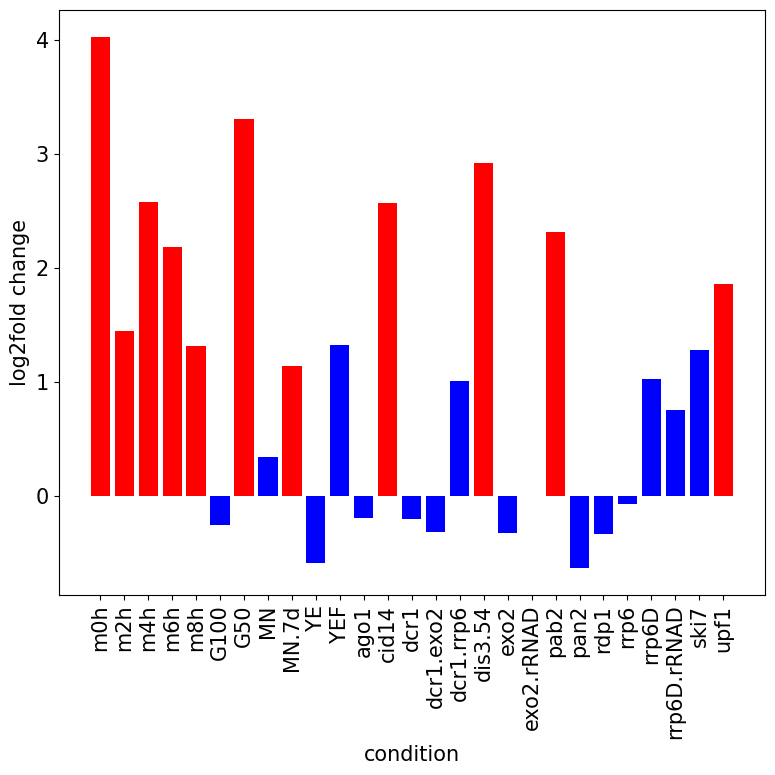

In [17]:
#keep only first row, remove first 5 columns
#find index of SPNCRNA.1524
index = df_full[df_full['gene_ID'] == 'SPBC317.01'].index
df=df_full.iloc[index,5:]

#show all columns
pd.set_option('display.max_columns', None)
#only keep columns that start with ratio or pval
df=df.filter(regex='ratio|pval')
#recreate the df by having a column for condition, one for ratio and one for pval
df=pd.melt(df,var_name='measurement',value_name='value')
#split the condition column into two columns
#split measurement to type and condition at _
df[['type','condition']]=df.measurement.str.split('_',expand=True)

#rearrange df such that ratio and pval become columns instead of values in type
df_=df.pivot_table(index=['condition'],columns='type',values='value')
#find index of rows with m0h m2h m4h m6h and m8h, then pout these rows at the start
indices = [df_.index.get_loc(c) for c in ['m0h','m2h','m4h','m6h','m8h']]
#save these rows
df__=df_.iloc[indices]
#drop these rows
df_=df_.drop(df_.index[indices])
#concatenate the two dfs
df_=pd.concat([df__,df_])
#create a barchart of ratios, and colour ones with pval<0.05 red
import matplotlib.pyplot as plt
import numpy as np
#create large figure
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(df_.index,df_['ratio'],color=np.where(df_['pval']<(0.05/len(df_['pval'])),'red','blue'))
ax.set_ylabel('log2fold change')
ax.set_xlabel('condition')
#rotate xticks
plt.xticks(rotation=90)
#make the plot prettyier
plt.tight_layout()
#increase a pick better font


In [18]:
#make above code block into function that takes gene id
def plot(gene_id):
      index = df_full[df_full['gene_ID'] == gene_id].index
      df=df_full.iloc[index,5:]

      #show all columns
      pd.set_option('display.max_columns', None)
      #only keep columns that start with ratio or pval
      df=df.filter(regex='ratio|pval')
      #recreate the df by having a column for condition, one for ratio and one for pval
      df=pd.melt(df,var_name='measurement',value_name='value')
      #split the condition column into two columns
      #split measurement to type and condition at _
      df[['type','condition']]=df.measurement.str.split('_',expand=True)

      #rearrange df such that ratio and pval become columns instead of values in type
      df_=df.pivot_table(index=['condition'],columns='type',values='value')
      #find index of rows with m0h m2h m4h m6h and m8h, then pout these rows at the start
      indices = [df_.index.get_loc(c) for c in ['m0h','m2h','m4h','m6h','m8h']]
      #save these rows
      df__=df_.iloc[indices]
      #drop these rows
      df_=df_.drop(df_.index[indices])
      #concatenate the two dfs
      df_=pd.concat([df__,df_])
      #create a barchart of ratios, and colour ones with pval<0.05 red
      import matplotlib.pyplot as plt
      import numpy as np
      #create large figure
      plt.rcParams.update({'font.size': 15})
      fig, ax = plt.subplots(figsize=(8,8))
      ax.bar(df_.index,df_['ratio'],color=np.where(df_['pval']<(0.05/len(df_['pval'])),'red','blue'))
      ax.set_ylabel('log2fold change')
      ax.set_xlabel('condition')
      #rotate xticks
      plt.xticks(rotation=90)
      #make the plot prettyier
      plt.tight_layout()
      return df_
            



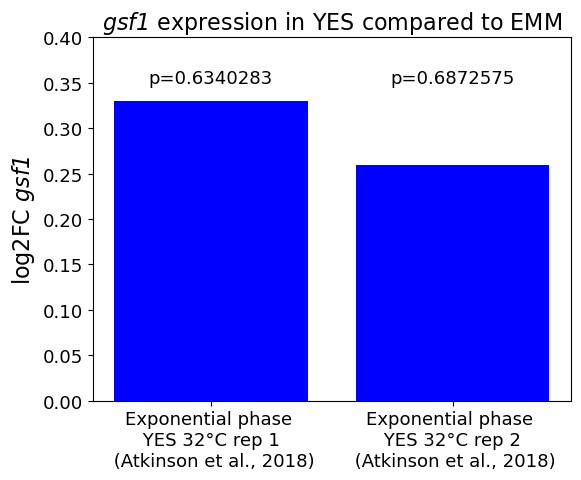

In [19]:
#make a function that plots only YE and YEF and write the pvalue above the bars
#keep only first row, remove first 5 columns
#find index of SPNCRNA.1524
index = df_full[df_full['gene_ID'] == 'SPBC15D4.02'].index
df=df_full.iloc[index,5:]

#show all columns
pd.set_option('display.max_columns', None)
#only keep columns that start with ratio or pval
df=df.filter(regex='ratio|pval')
#recreate the df by having a column for condition, one for ratio and one for pval
df=pd.melt(df,var_name='measurement',value_name='value')
#split the condition column into two columns
#split measurement to type and condition at _
df[['type','condition']]=df.measurement.str.split('_',expand=True)

#rearrange df such that ratio and pval become columns instead of values in type
df_=df.pivot_table(index=['condition'],columns='type',values='value')
#find index of rows with m0h m2h m4h m6h and m8h, then pout these rows at the start
indices = [df_.index.get_loc(c) for c in ['m0h','m2h','m4h','m6h','m8h']]
#save these rows
df__=df_.iloc[indices]
#drop these rows
df_=df_.drop(df_.index[indices])
#concatenate the two dfs
df_=pd.concat([df__,df_])
#df only retain measurements with YE in anme
df_=df_[df_.index.str.contains('YE')]
plt.rcParams.update({'font.size': 13})
#rename YEF to Exponentially proliferating cells; YES 32°C rep 2
df_.index=df_.index.str.replace('YEF','Exponential phase \n YSS 32°C rep 2 \n (Atkinson et al., 2018)')
#rename the value where it is only YE and not more, to Exponentially proliferating cells; YES 32°C rep 1
df_.index=df_.index.str.replace('YE','Exponential phase \n YES 32°C rep 1 \n (Atkinson et al., 2018)')
#rename 'Exponential phase \n YSS 32°C rep 2' to'Exponential phase \n YES 32°C rep 2'
df_.index=df_.index.str.replace('Exponential phase \n YSS 32°C rep 2','Exponential phase \n YES 32°C rep 2')



fig, ax = plt.subplots(figsize=(6,5))
ax.bar(df_.index,df_['ratio'],color=np.where(df_['pval']<(0.05/len(df_['pval'])),'red','blue'))

ax.set_xlabel('')
#write p value above bars
for i in range(len(df_['pval'])):
      ax.text(i,0.35,'p='+str(df_['pval'][i]),horizontalalignment='center')
#set ylim to 0.45
ax.set_ylim(0,0.4)
#y axis log2 FC
ax.set_ylabel( r'$\mathrm{log2FC}$' +' gsf1', fontsize=16, fontstyle='italic')
#title gsf1 expression in YES compared to EMM
ax.set_title('gsf1 ' + r'$\mathrm{expression\ in\ YES\ compared\ to\ EMM}$', fontsize=16, fontstyle='italic')
plt.tight_layout()
#save as svg and png
fig.savefig(root + 'Figures/All figures/gsf1_yes_emm.svg', format='svg',dpi=400)
fig.savefig(root + 'Figures/All figures/gsf1_yes_emm.png', format='png',dpi=400)